In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def straddle_payoff(strike_price, call_premium, put_premium, stock_prices):
    """
    Calculate the payoff and profit/loss of a straddle strategy
    
    Parameters:
    strike_price (float): Strike price of both call and put options
    call_premium (float): Premium paid for the call option
    put_premium (float): Premium paid for the put option
    stock_prices (array): Range of possible stock prices at expiration
    
    Returns:
    tuple: (payoff array, profit/loss array)
    """
    # Calculate call option payoff (max(0, S - K))
    call_payoff = np.maximum(0, stock_prices - strike_price)
    
    # Calculate put option payoff (max(0, K - S))
    put_payoff = np.maximum(0, strike_price - stock_prices)
    
    # Total payoff is sum of call and put payoffs
    total_payoff = call_payoff + put_payoff
    
    # Total premium paid for both options
    total_premium = call_premium + put_premium
    
    # Profit/Loss is payoff minus premium paid
    profit_loss = total_payoff - total_premium
    
    return total_payoff, profit_loss

In [6]:
def plot_straddle(strike_price, call_premium, put_premium, stock_prices):
    """Plot the payoff and profit/loss diagrams for a straddle strategy"""
    payoff, profit_loss = straddle_payoff(strike_price, call_premium, put_premium, stock_prices)
    
    plt.figure(figsize=(10, 6))
    
    # Plot payoff diagram
    plt.subplot(1, 2, 1)
    plt.plot(stock_prices, payoff, 'b-')
    plt.axvline(x=strike_price, color='k', linestyle='--')
    plt.title('Straddle Payoff Diagram')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.grid(True)
    
    # Plot profit/loss diagram
    plt.subplot(1, 2, 2)
    plt.plot(stock_prices, profit_loss, 'r-')
    plt.axvline(x=strike_price, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.title('Straddle Profit/Loss Diagram')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Profit/Loss')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

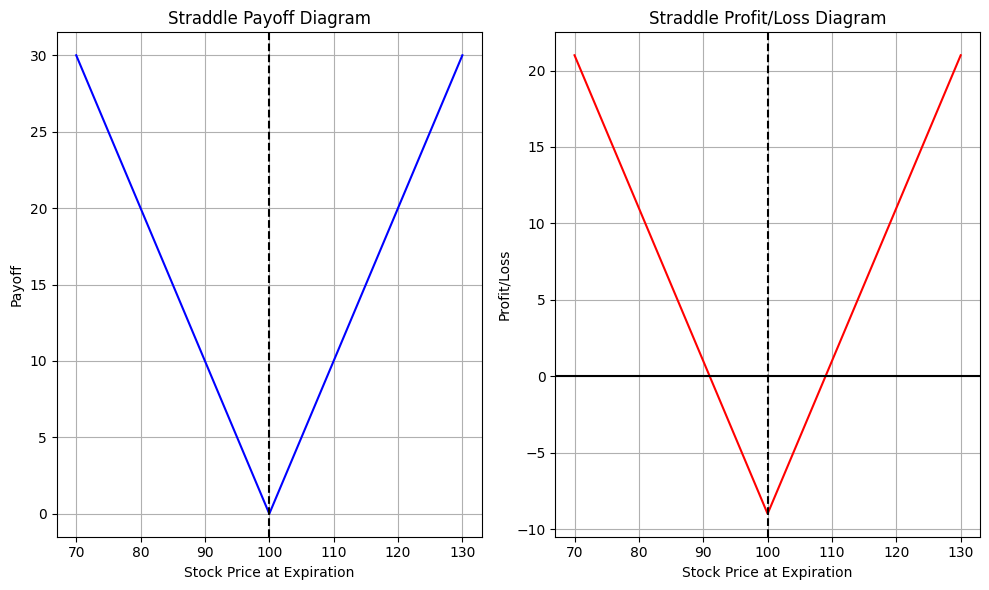

Upper Breakeven Point: 109
Lower Breakeven Point: 91
Maximum Loss: -9 (occurs when stock price = 100)
Maximum Profit: Unlimited on the upside, Limited on the downside (to strike price - premiums)


In [7]:
#  Straddle : Buy 1 call option and 1 put option with same strike and expiration
if __name__ == "__main__":
    # Input parameters
    strike_price = 100  # Strike price for both call and put
    call_premium = 5    # Premium paid for call option
    put_premium = 4     # Premium paid for put option
    
    # Generate a range of possible stock prices at expiration
    stock_prices = np.arange(70, 131, 1)
    
    # Calculate and plot
    payoff, profit_loss = straddle_payoff(strike_price, call_premium, put_premium, stock_prices)
    plot_straddle(strike_price, call_premium, put_premium, stock_prices)
    
    # Print breakeven points
    total_premium = call_premium + put_premium
    upper_breakeven = strike_price + total_premium
    lower_breakeven = strike_price - total_premium
    print(f"Upper Breakeven Point: {upper_breakeven}")
    print(f"Lower Breakeven Point: {lower_breakeven}")
    print(f"Maximum Loss: {-total_premium} (occurs when stock price = {strike_price})")
    print("Maximum Profit: Unlimited on the upside, Limited on the downside (to strike price - premiums)")